# Quarentena Dados: Python, Pandas e Jupyter Notebook

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [0]:
filmes.columns = ['filmeId', 'titulo', 'generos']

In [0]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
filmes = filmes.dropna()

In [0]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes = avaliacoes.dropna()
avaliacoes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [0]:
avaliacoes.columns = ['userId', 'filmeId', 'nota', 'timestamp']

In [0]:
avaliacoes_medias_filmes = avaliacoes.groupby('filmeId')['nota'].mean()
avaliacoes_medias_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

## Juntando os filmes e as médias

In [0]:
filmes_medias= filmes.join(avaliacoes_medias_filmes, on="filmeId")
filmes_medias.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_medias.columns = ['filmeId', 'titulo', 'generos', 'media']
filmes_medias.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_medias.sort_values("media", ascending=False).head(15)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


## Observando o comportamento das médias

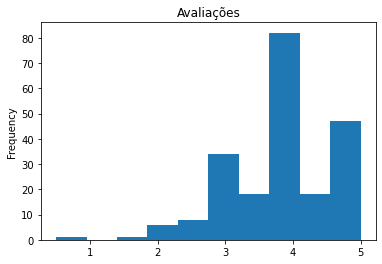

In [0]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind = 'hist', title = 'Avaliações')

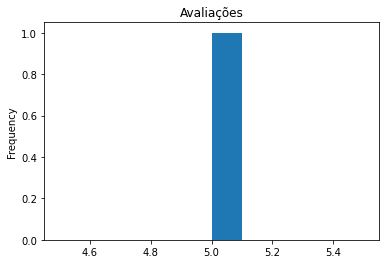

In [0]:
avaliacoes.query('filmeId == 100906')['nota'].plot(kind = 'hist',  title = 'Avaliações')

In [0]:
def limpeza(gen, text):
    gen[text] = gen[text].str.replace(r"|", " ")
    return gen

In [0]:
teste = limpeza(filmes_medias, "generos")
teste.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.920930
1,2,Jumanji (1995),Adventure Children Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filmes_medias['media'] = filmes_medias['media'].round(2)
filmes_medias

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.92
1,2,Jumanji (1995),Adventure Children Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy Romance,3.26
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,3.50


In [0]:
generos_existentes = filmes_medias.generos.str.get_dummies(' ').dropna()
generos = generos_existentes.columns.to_list()
generos

['(no',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'genres',
 'listed)']

In [0]:
#pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html
total_generos = filmes_medias.generos.str.get_dummies(' ').sum()
total_generos

(no              34
Action         1828
Adventure      1263
Animation       611
Children        664
Comedy         3756
Crime          1199
Documentary     440
Drama          4361
Fantasy         779
Film-Noir        87
Horror          978
IMAX            158
Musical         334
Mystery         573
Romance        1596
Sci-Fi          980
Thriller       1894
War             382
Western         167
genres           34
listed)          34
dtype: int64

In [0]:
total_generos.count()

22

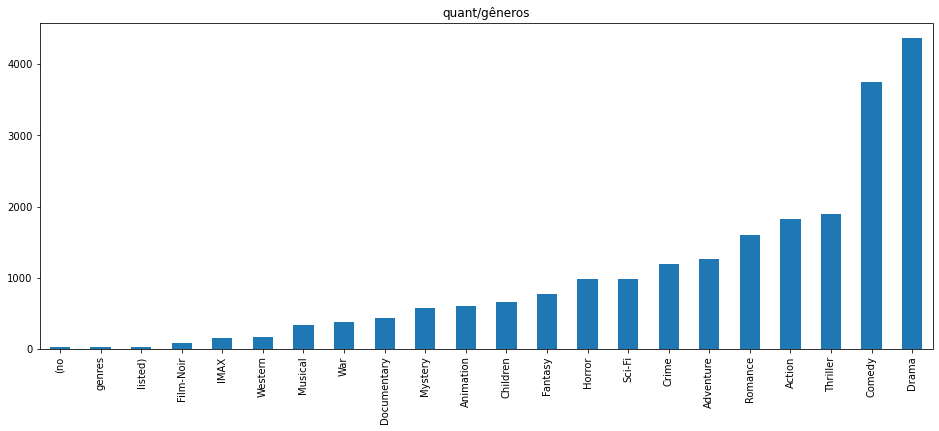

In [0]:
total_generos.sort_values(ascending=True).plot(kind='bar', figsize=(16, 6), title = 'quant/gêneros')